# Iphone 12

In [101]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])
df_12=df[(df['phone_generation'] == 'iphone 12')]

In [102]:
df_12=df_12[['phone_size', 'phone_color',  'claim' ]]
df_12['phone_size'] = df_12['phone_size'].str.replace('gb', '')

print(df_12)

     phone_size phone_color  claim
3027        128       black     14
3028        128       black     43
3029        128       black     57
3030        128       black     65
3031        128       black     59
...         ...         ...    ...
6241        512      silver      7
6242        512      silver      9
6243        512      silver      5
6244        512      silver      8
6245        512      silver     12

[3219 rows x 3 columns]


In [103]:
from sklearn.model_selection import train_test_split

X = df_12[['phone_color', 'phone_size']]
y = df_12['claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
X_train = pd.get_dummies(X_train, columns=['phone_color'])
X_test = pd.get_dummies(X_test, columns=['phone_color'])

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 5153.23
R2 score: 0.36


# Predict the claim by phone color

> Linear regression model

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load the dataset
df = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv')
df=df[(df['phone_generation'] == 'iphone 12')]
df=df[[ 'phone_color',  'claim' ]]
#df['phone_size'] = df['phone_size'].str.replace('gb', '')


# preprocess the data
one_hot = pd.get_dummies(df['phone_color'])
df = pd.concat([df, one_hot], axis=1)
#df['phone_size'] = df['phone_size'].str.replace('gb', '').astype(float)

df=df.drop(['phone_color'], axis=1)
print(df)

      claim  black  blue  gold  gray  green  purple  red  silver  white
3027     14      1     0     0     0      0       0    0       0      0
3028     43      1     0     0     0      0       0    0       0      0
3029     57      1     0     0     0      0       0    0       0      0
3030     65      1     0     0     0      0       0    0       0      0
3031     59      1     0     0     0      0       0    0       0      0
...     ...    ...   ...   ...   ...    ...     ...  ...     ...    ...
6241      7      0     0     0     0      0       0    0       1      0
6242      9      0     0     0     0      0       0    0       1      0
6243      5      0     0     0     0      0       0    0       1      0
6244      8      0     0     0     0      0       0    0       1      0
6245     12      0     0     0     0      0       0    0       1      0

[3219 rows x 10 columns]


In [114]:
# split the data into features and target
X = df.drop('claim', axis=1)
y = df['claim']

# train a linear regression model
model = LinearRegression()
model.fit(X, y)

# make a prediction for a new phone color (e.g. 'pink')
new_color = pd.DataFrame({'black': 1, 'blue': 0, 'gold': 0, 'gray': 0,
                           'green': 0, 'purple': 0, 'red': 0, 'silver': 0,
                           'white': 0}, index=[0])
prediction = model.predict(new_color)

print(f"The predicted claim volume for the new phone color is {prediction[0]}")

The predicted claim volume for the new phone color is 86.828125


In [115]:
# make predictions for the training data
y_pred = model.predict(X)

# compute the evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared score: {r2:.2f}")

MSE: 5659.69
RMSE: 75.23
R-squared score: 0.28


## Decision Trees

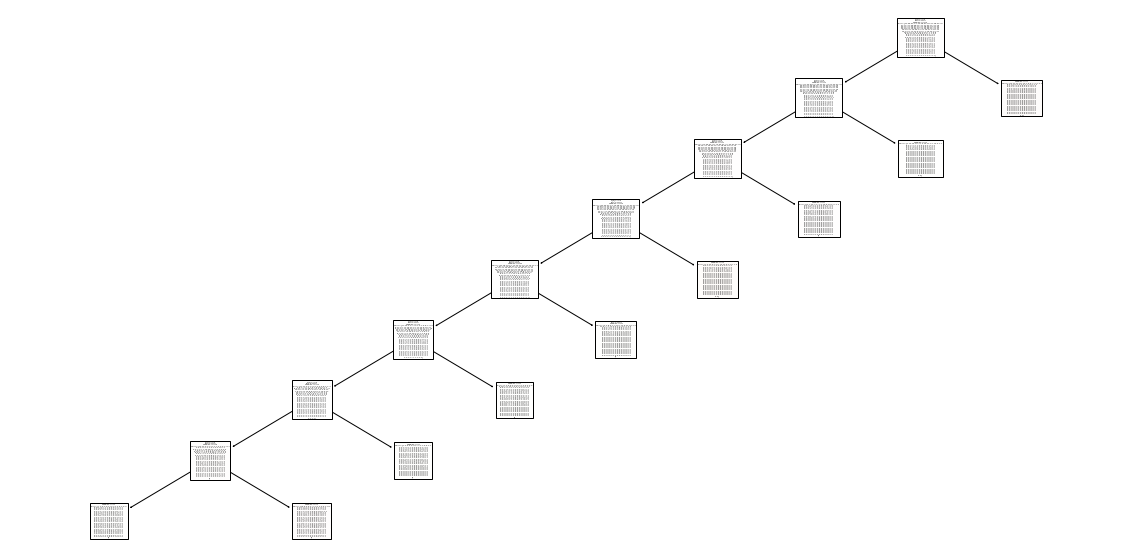

In [116]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()



# Predict the claim by phone size

> Linear regression model

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load the dataset
df = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv')
df=df[(df['phone_generation'] == 'iphone 12')]
df=df[[ 'phone_size',  'claim' ]]
df['phone_size'] = df['phone_size'].str.replace('gb', '')


# preprocess the data
one_hot = pd.get_dummies(df['phone_size'])
df = pd.concat([df, one_hot], axis=1)
df['phone_size'] = df['phone_size'].str.replace('gb', '').astype(float)

df=df.drop(['phone_size'], axis=1)
print(df)

      claim  128  256  512  64
3027     14    1    0    0   0
3028     43    1    0    0   0
3029     57    1    0    0   0
3030     65    1    0    0   0
3031     59    1    0    0   0
...     ...  ...  ...  ...  ..
6241      7    0    0    1   0
6242      9    0    0    1   0
6243      5    0    0    1   0
6244      8    0    0    1   0
6245     12    0    0    1   0

[3219 rows x 5 columns]


In [97]:
# split the data into features and target
X = df.drop('claim', axis=1)
y = df['claim']

# train a linear regression model
model = LinearRegression()
model.fit(X, y)

# make a prediction for a new phone color (e.g. 'pink')
new_color = pd.DataFrame({'128': 1, '256': 0, '512': 0, '64': 0}, index=[0])
prediction = model.predict(new_color)

print(f"The predicted claim volume for the new phone size is {prediction[0]}")

The predicted claim volume for the new phone size is 92.0


In [98]:
# make predictions for the training data
y_pred = model.predict(X)

# compute the evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared score: {r2:.2f}")

MSE: 7521.62
RMSE: 86.73
R-squared score: 0.04


## Decision Tree

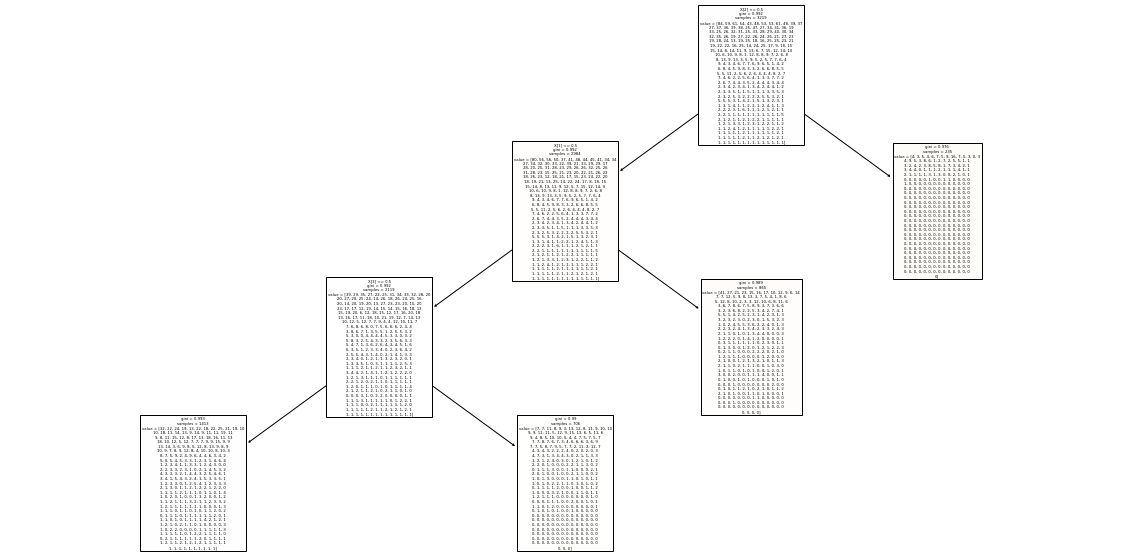

In [99]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()
